In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [12]:
df = pd.read_csv("C:/Users/LENOVO/Desktop/Machine Learning Module/Cases/Wisconsin/BreastCancer.csv")

In [13]:
df.head()

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign


In [18]:
df=pd.get_dummies(df,drop_first=True)

In [19]:
X = df.iloc[:,1:10]
y = df.iloc[:,10]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=2020,
                                                    stratify=y)


In [23]:
clf=DecisionTreeClassifier(max_depth=3)

In [24]:
clf.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3)

In [25]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[130   8]
 [  4  68]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       138
           1       0.89      0.94      0.92        72

    accuracy                           0.94       210
   macro avg       0.93      0.94      0.94       210
weighted avg       0.94      0.94      0.94       210

0.9428571428571428


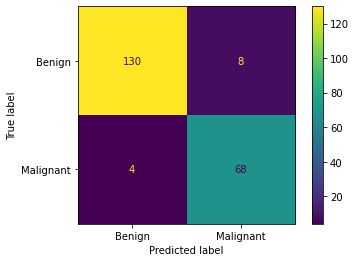

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test,y_test,display_labels=['Benign','Malignant'])

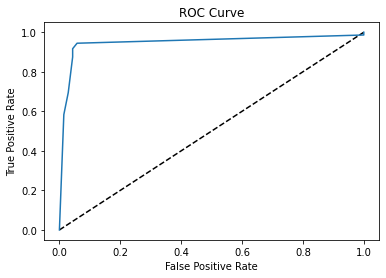

0.9476650563607085

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve 
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)

[Text(167.4, 190.26, 'UniCell_Size <= 3.5\ngini = 0.452\nsamples = 489\nvalue = [320, 169]\nclass = Benign'),
 Text(83.7, 135.9, 'BareN <= 5.5\ngini = 0.133\nsamples = 335\nvalue = [311, 24]\nclass = Benign'),
 Text(41.85, 81.53999999999999, 'NoemN <= 3.5\ngini = 0.061\nsamples = 320\nvalue = [310, 10]\nclass = Benign'),
 Text(20.925, 27.180000000000007, 'gini = 0.019\nsamples = 309\nvalue = [306, 3]\nclass = Benign'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.463\nsamples = 11\nvalue = [4, 7]\nclass = Malignant'),
 Text(125.55000000000001, 81.53999999999999, 'Mitoses <= 2.5\ngini = 0.124\nsamples = 15\nvalue = [1, 14]\nclass = Malignant'),
 Text(104.625, 27.180000000000007, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = Malignant'),
 Text(146.475, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Malignant'),
 Text(251.10000000000002, 135.9, 'UniCell_Size <= 4.5\ngini = 0.11\nsamples = 154\nvalue = [9, 145]\nclass = Malignant'),
 Text(209.25, 8

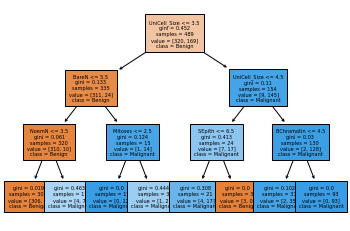

In [28]:
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['Benign','Malignant'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# or

tree.plot_tree(clf,feature_names=X_train.columns,
               class_names=['Benign','Malignant'],
               filled=True,fontsize=5) 

# ****************************Grid_serch_cv*******************************

In [29]:
depth_range = [3,4,5,6,7,8,9]

In [30]:
minsplit_range = [5,10,20,25,30]
minleaf_range = [5,10,15]


In [31]:
parameters = dict(max_depth=depth_range,min_samples_split=minsplit_range,min_samples_leaf=minleaf_range)

In [38]:
kfold=StratifiedKFold(n_splits=5,random_state=2021,shuffle=True)

In [42]:
cv=GridSearchCV(clf,param_grid=parameters,cv=kfold,scoring='roc_auc')

In [43]:
cv

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 20, 25, 30]},
             scoring='roc_auc')

In [44]:
cv.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 20, 25, 30]},
             scoring='roc_auc')

In [46]:
print(cv.best_params_)

print(cv.best_score_)


{'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 25}
0.9850713012477719


[Text(182.61818181818182, 195.696, 'UniCell_Size <= 3.5\ngini = 0.452\nsamples = 489\nvalue = [320, 169]\nclass = Benign'),
 Text(121.74545454545455, 152.208, 'BareN <= 5.5\ngini = 0.133\nsamples = 335\nvalue = [311, 24]\nclass = Benign'),
 Text(91.30909090909091, 108.72, 'NoemN <= 3.5\ngini = 0.061\nsamples = 320\nvalue = [310, 10]\nclass = Benign'),
 Text(60.872727272727275, 65.232, 'BareN <= 2.5\ngini = 0.019\nsamples = 309\nvalue = [306, 3]\nclass = Benign'),
 Text(30.436363636363637, 21.744, 'gini = 0.0\nsamples = 285\nvalue = [285, 0]\nclass = Benign'),
 Text(91.30909090909091, 21.744, 'gini = 0.219\nsamples = 24\nvalue = [21, 3]\nclass = Benign'),
 Text(121.74545454545455, 65.232, 'gini = 0.463\nsamples = 11\nvalue = [4, 7]\nclass = Malignant'),
 Text(152.1818181818182, 108.72, 'gini = 0.124\nsamples = 15\nvalue = [1, 14]\nclass = Malignant'),
 Text(243.4909090909091, 152.208, 'UniCell_Size <= 4.5\ngini = 0.11\nsamples = 154\nvalue = [9, 145]\nclass = Malignant'),
 Text(213.0545

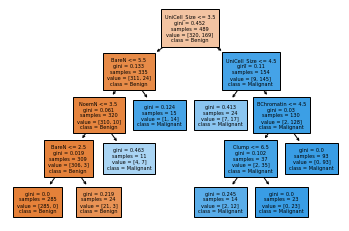

In [48]:

tree.plot_tree(best_model,feature_names=X.columns,
               class_names=['Benign','Malignant'],
               filled=True,fontsize=5) 

[1.81570515e-03 8.32014735e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.22736146e-01 7.90651542e-04 4.26427616e-02
 0.00000000e+00]


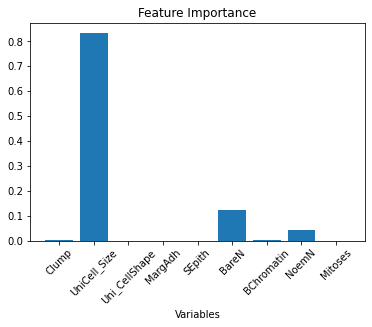

In [50]:
import matplotlib.pyplot as plt
import numpy as np
print(best_model.feature_importances_)

ind = np.arange(9)
plt.bar(ind,best_model.feature_importances_)
plt.xticks(ind,(X.columns),rotation=45)
plt.title('Feature Importance')
plt.xlabel("Variables")
plt.show()